---
# Guía Intervalos de Confianza

El intervalo de confianza es un tipo de estimación calculada a partir de las estadísticas de los datos observados que proporciona un rango de valores que probablemente contenga un parámetro de población con un nivel particular de confianza.

Un intervalo de confianza para la media es un rango de valores entre los que posiblemente se encuentra la media de la población. Si hiciera una predicción meteorológica para mañana de entre -100 grados y +100 grados, puedo estar 100% seguro de que esto será correcto. Sin embargo, si hago la predicción entre 20,4 y 20,5 grados Celsius, tengo menos confianza. Observe cómo disminuye la confianza a medida que disminuye el intervalo. Lo mismo se aplica a los intervalos de confianza estadísticos, pero también se basan en otros factores.

Un intervalo de confianza del 95% me dirá que si tomamos un número infinito de muestras de mi población, calculamos el intervalo cada vez, entonces, en el 95% de esos intervalos, el intervalo contendrá la media real de la población. Entonces, con una muestra podemos calcular la media de la muestra y, a partir de ahí, obtener un intervalo a su alrededor, que muy probablemente contendrá la media de la población real.



In [27]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a) #error estandar de la media (S/sqrt(n))
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


muestra = range(10,14)
mean_confidence_interval(muestra)
a = 1.0 * np.array(muestra)
a
mean_confidence_interval(muestra)

(np.float64(11.5),
 np.float64(9.445739743239121),
 np.float64(13.554260256760879))

### Intervalos de confianza utilizando la distribución t

Si estamos trabajando con una muestra pequeña (n <30), podemos usar la función t.interval () de la biblioteca scipy.stats para calcular un intervalo de confianza para una media poblacional.



In [28]:
a = range(10,14)
nivel_conf=0.95
scipy.stats.t.interval(confidence=nivel_conf, df=len(a)-1, loc=np.mean(a), scale=scipy.stats.sem(a))

(np.float64(9.445739743239121), np.float64(13.554260256760879))

Notará que cuanto mayor sea el nivel de confianza, más amplio será el intervalo de confianza. Por ejemplo, aquí se explica cómo calcular un IC del 99% para exactamente los mismos datos:

In [29]:
a = range(10,14)
scipy.stats.t.interval(confidence=0.99, df=len(a)-1, loc=np.mean(a), scale=scipy.stats.sem(a))

(np.float64(7.729709252782478), np.float64(15.270290747217523))

In [30]:
#otra forma de calcular los IC
import statsmodels.stats.api as sms

sms.DescrStatsW(a).tconfint_mean()

(np.float64(9.44573974323912), np.float64(13.55426025676088))

In [31]:
#otra forma de calcular los IC
import statsmodels.stats.api as sms

sms.DescrStatsW(a).zconfint_mean()

(np.float64(10.23484868811834), np.float64(12.76515131188166))

### Intervalos de confianza utilizando la distribución normal

Si estamos trabajando con muestras más grandes (n≥30), podemos asumir que la distribución muestral de la media muestral se distribuye normalmente (gracias al Teorema del límite central ) y en su lugar podemos usar la función norm.interval () de scipy biblioteca de estadísticas.



In [32]:
import numpy as np
import scipy.stats as st

#define datos de muestra
np.random.seed (0)
datos = np.random.randint (10, 30, 50)

st.norm.interval(confidence = 0.95 , loc = np.mean(datos), scale = st.sem(datos))


(np.float64(17.400060940568054), np.float64(21.079939059431943))

Existe una probabilidad del 95% de que el intervalo de confianza de [17.4, 21.08] contenga la media real de la población del experimento.

Otra forma de decir lo mismo es que solo hay un 5% de probabilidad de que la media real de la población esté fuera del intervalo de confianza del 95%. 

### Graficar intervalos de confianza

La función lineplot() que está disponible en Seaborn, una biblioteca de visualización de datos para Python, es la mejor para mostrar tendencias durante un período de tiempo, sin embargo, también ayuda a trazar el intervalo de confianza.

De forma predeterminada, la gráfica agrega varios valores de y en cada valor de x y muestra una estimación de la tendencia central y un intervalo de confianza para esa estimación.



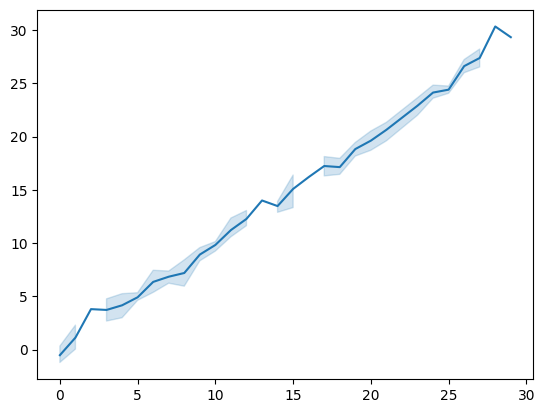

In [33]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
np.random.seed(0) 
x = np.random.randint(0, 30, 100) 
y = x+np.random.normal(0, 1, 100) 
  
ax = sns.lineplot(x=x, y=y)

El tono azul claro indica el nivel de confianza alrededor de ese punto, si tiene mayor confianza, la línea sombreada será más gruesa.

En el código anterior, la variable x almacenará 100 enteros aleatorios de 0(inclusive) a 30(exclusivo) y la variable y almacenará 100 muestras de la distribución Gaussiana(Normal) que se centra en 0 con desviación estándar / dispersión 1. Operaciones numéricas generalmente se realizan en pares de matrices elemento por elemento. En el caso más simple, las dos matrices deben tener exactamente la misma forma, como en el ejemplo anterior. Finalmente, se crea un gráfico de líneas con la ayuda de la biblioteca seaborn con un intervalo de confianza del 95% de forma predeterminada. El intervalo de confianza se puede cambiar fácilmente cambiando el valor del parámetro ‘ci’ que se encuentra dentro del rango de [0, 100], aquí no he pasado este parámetro, por lo tanto, considera el valor predeterminado 95.

### Calcular CI dada la distribución subyacente usando regplot()

La función regplot() funciona de la misma manera que lineplot() con un intervalo de confianza del 95% por defecto. El intervalo de confianza se puede cambiar fácilmente cambiando el valor del parámetro ‘ci’ que se encuentra en el rango de [0, 100]. Aquí he pasado ci = 80, lo que significa que en lugar del intervalo de confianza predeterminado del 95%, se traza un intervalo de confianza del 80%

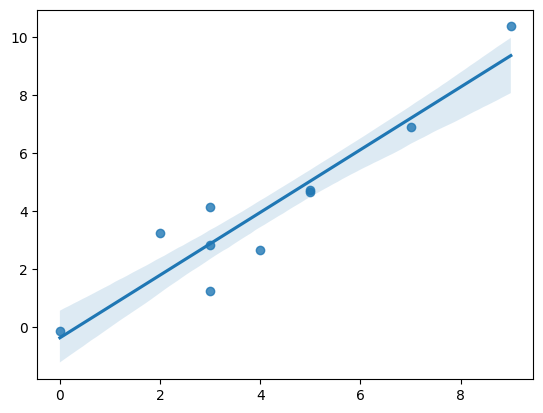

In [34]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
np.random.seed(0) 
x = np.random.randint(0, 10, 10) 
y = x+np.random.normal(0, 1, 10) 
  
ax = sns.regplot(x=x, y=y, ci=80)

El ancho del tono de color azul claro indica el nivel de confianza alrededor de la línea de regresión.

### Computación CI usando Bootstrapping


Bootstrapping es una prueba / métrica que usa muestreo aleatorio con reemplazo. Proporciona la medida de precisión(sesgo, varianza, intervalos de confianza, error de predicción, etc.) a las estimaciones de muestra. Permite la estimación de la distribución muestral para la mayoría de las estadísticas utilizando métodos de muestreo aleatorio. También se puede utilizar para construir pruebas de hipótesis. 

In [35]:
import pandas 
import numpy 
from sklearn.utils import resample 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt 

In [36]:
x = numpy.array([180,162,158,172,168,150,171,183,165,176]) 

n_iterations = 5000
n_size = int(len(x)) 
  
medians = list() 
for i in range(n_iterations): 
   s = resample(x, n_samples=n_size); 
   m = numpy.median(s); 
   medians.append(m)  


In [37]:
print("Mediana muestreo", numpy.median(medians))
print("Desv Est muestreo", numpy.std(medians))

Mediana muestreo 169.5
Desv Est muestreo 3.8738194279031646


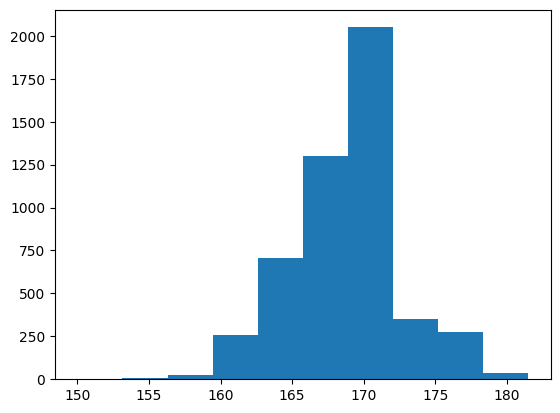

In [38]:
plt.hist(medians, bins=10) 
plt.show() 

In [39]:

alpha = 0.95
p0 = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p0) 
p1 = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p1) 
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")


95.0 confidence interval 161.5 and 176.0


Después de importar todas las bibliotecas necesarias, cree una muestra S con tamaño n = 10 y guárdela en una variable x. Usando un ciclo simple, genere 1000 muestras artificiales(= k) con cada tamaño de muestra m = 10(ya que m <= n). Estas muestras se denominan muestra bootstrapped. Sus medianas se calculan y almacenan en una lista de ‘medianas’. El histograma de medianas de 1000 muestras de arranque se traza con la ayuda de la biblioteca matplotlib y, utilizando el intervalo de confianza de la fórmula de una estadística de muestra, se calcula un límite superior e inferior para el valor de población de la estadística en un nivel de confianza específico basado en datos de muestra .

Existen varios métodos para estimar intervalos de confianza mediante el uso de bootstrapping:

Intervalos basados en distribución normal (normal bootstrap intervals)

Intervalos basados en percentiles (percentile bootstrap intervals)

Intervalos basados en distribución Student's (bootstrap Student's t intervals)

Bias-Corrected and Accelerated Bootstrap Method (BCA)

Intervalos empíricos (empirical bootstrap intervals)

Ejemplo: Se dispone de una muestra formada por 30 observaciones de una variable aleatoria continua. Se desea calcular un intervalo de confianza del 95% para la media empleando el método de bootstrapping basado en percentiles.

In [40]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Varios
# ==============================================================================
from tqdm import tqdm

In [41]:
# Datos
# ==============================================================================
datos = np.array([
            81.372918, 25.700971, 4.942646, 43.020853, 81.690589, 51.195236,
            55.659909, 15.153155, 38.745780, 12.610385, 22.415094, 18.355721,
            38.081501, 48.171135, 18.462725, 44.642251, 25.391082, 20.410874,
            15.778187, 19.351485, 20.189991, 27.795406, 25.268600, 20.177459,
            15.196887, 26.206537, 19.190966, 35.481161, 28.094252, 30.305922
        ])

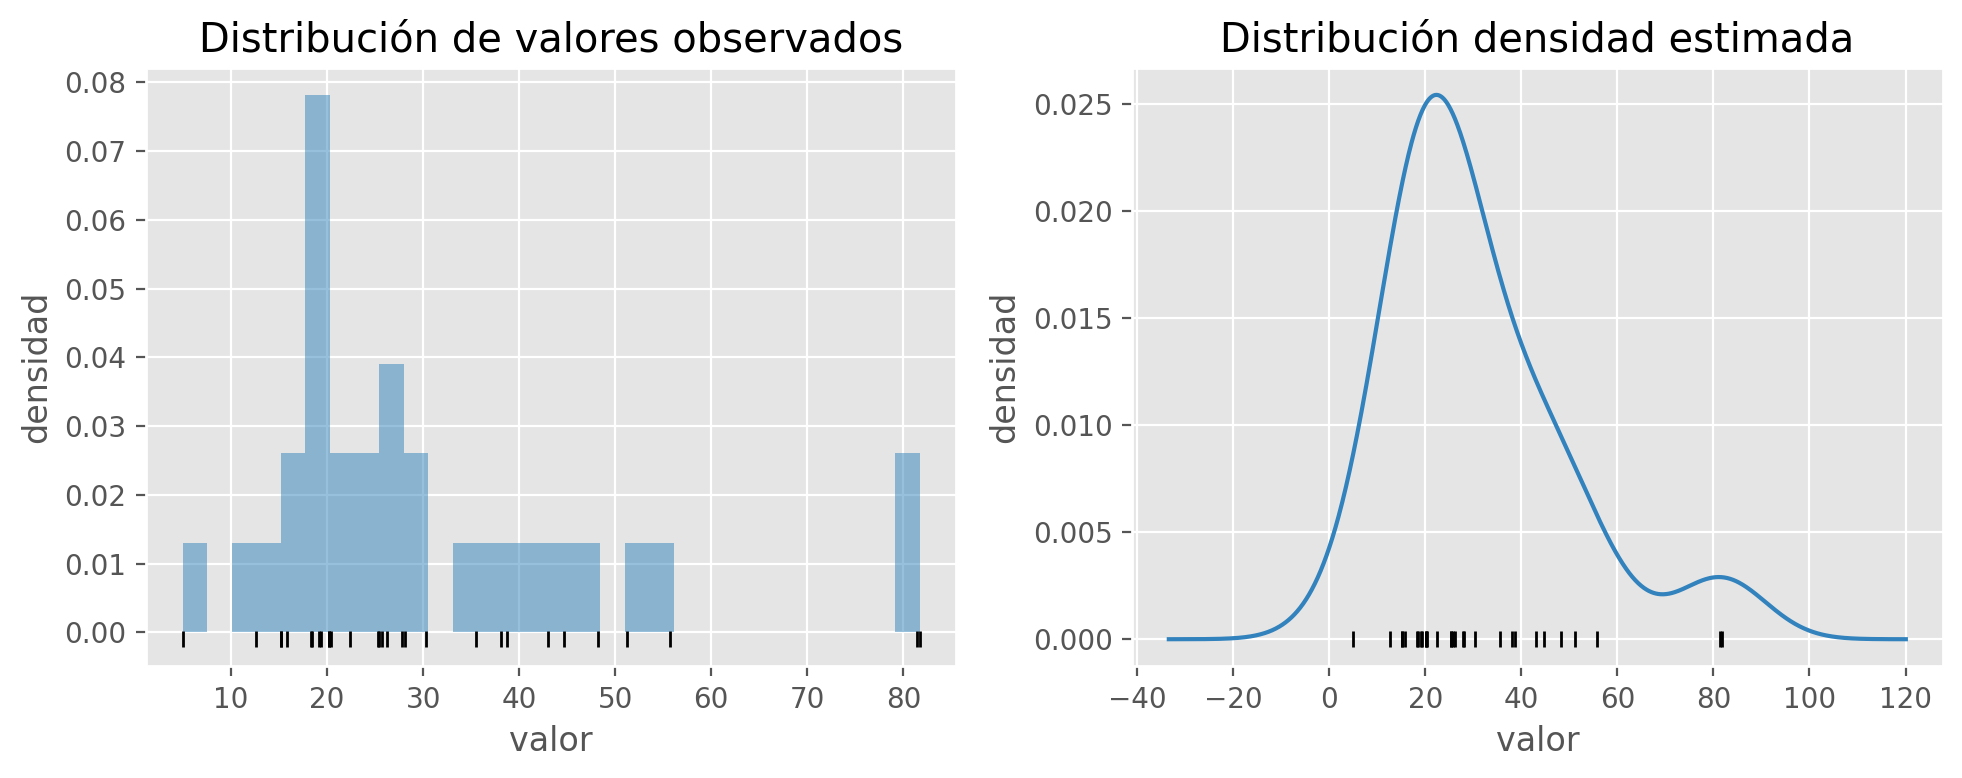

In [42]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(datos, bins=30, density=True, color='#3182bd', alpha=0.5, label = 'muestra_1')
axs[0].plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Distribución de valores observados')
axs[0].set_xlabel('valor')
axs[0].set_ylabel('densidad')

pd.Series(datos).plot.kde(ax=axs[1],color='#3182bd')
axs[1].plot(datos, np.full_like(datos, 0), '|k', markeredgewidth=1)
axs[1].set_title('Distribución densidad estimada')
axs[1].set_xlabel('valor')
axs[1].set_ylabel('densidad')

fig.tight_layout();

La representación gráfica muestra evidencias de que los datos no se distribuyen de forma normal. Esto implica que, la aproximación basada en el teorema del límite central para estimar el error estándar  𝑆𝐸=𝑠𝑑/√𝑛 , deja de ser buena y con ella los intervalos paramétricos basados en la estructura  [parámetro estimado±𝑡𝛼𝑆𝐸] . Una alternativa para poder calcular intervalos de confianza es emplear bootstrapping.

Mediante bootstrapping, se simula la variabilidad esperada en el estadístico, en este caso la media, debido únicamente al muestreo aleatorio.

In [43]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples muestras generadas
    mediante muestreo repetido con reposición (bootstrapping).
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada muestra de bootstrapping.
    '''
    
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

In [44]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 81952.46it/s]


In [45]:
dist_boot

array([27.9431474 , 29.06570433, 30.57616227, ..., 21.3239397 ,
       26.72858473, 32.74124223], shape=(9999,))

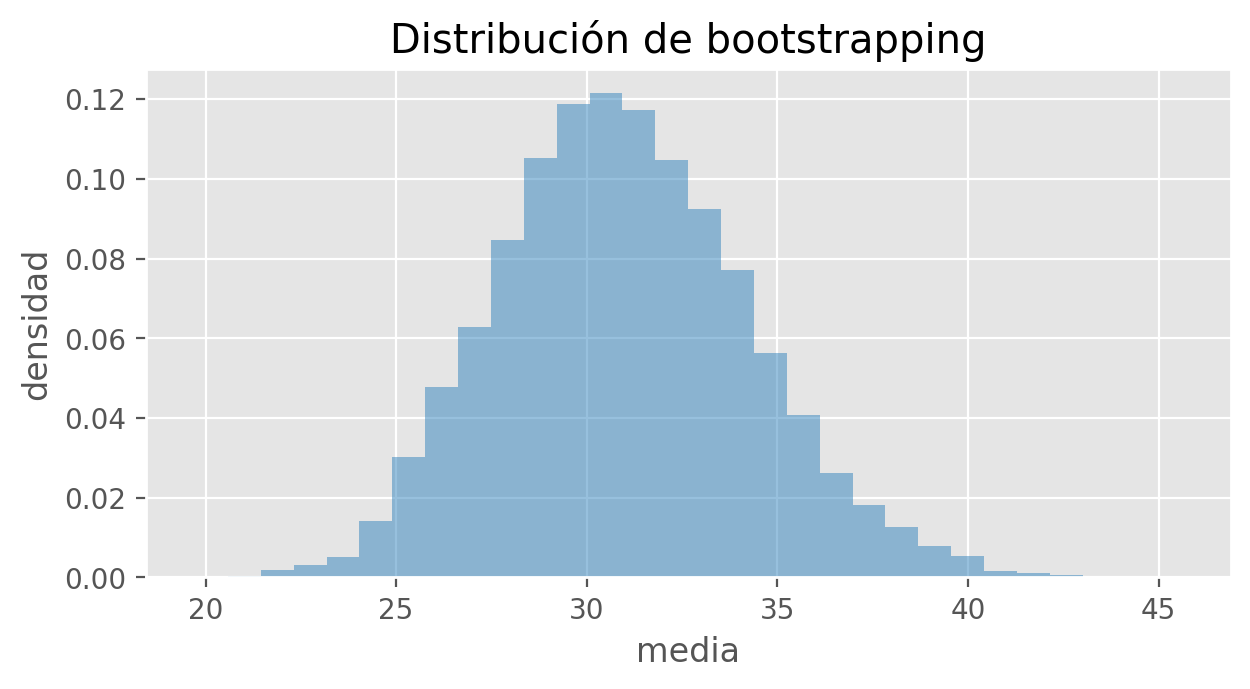

In [46]:
# Distribución de bootstrapping
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');


La dispersión de la distribución obtenida por bootstrapping es una aproximación del error estándar esperado debido a proceso de muestreo. Por esta razón, pueden emplearse sus percentiles para calcular intervalos de confianza.

In [47]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[25.02617719 37.88164823]


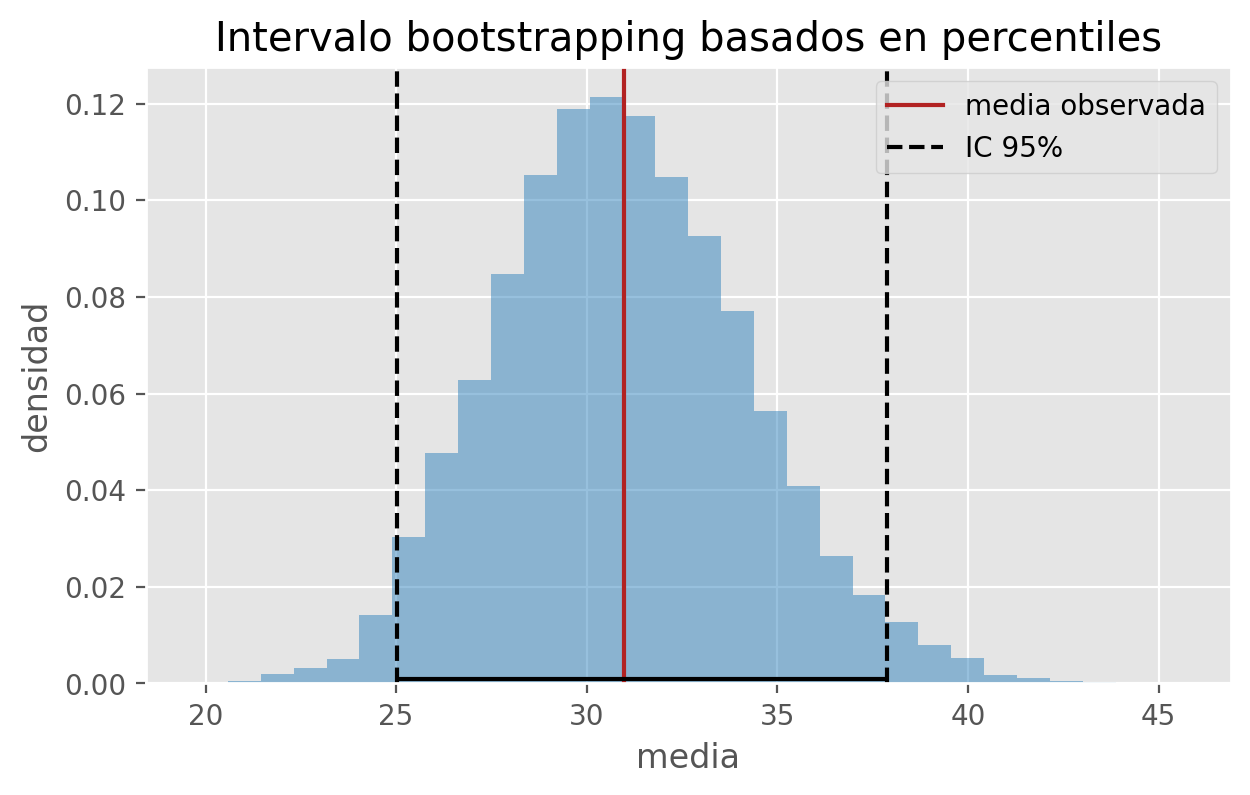

In [48]:
# Gráfico intervalo de confianza del 95%
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=datos.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo bootstrapping basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();